Notebook Purpose:

- Verify CoinAPI test key
- Connect to [CoinAPI](https://www.coinapi.io/)
- Create sample query to CoinAPI as proof of concept
- Visualize sample query results
- Determine how best to move forward -> [Dash/Plotly](https://plotly.com/dash/)


Next:

- Generate queries, store historical data, determine how new data will be retrieved/stored
- Data Cleaning
- Feature Engineering
- Time Series model(s) selection
- Determine how to proceed with Tweetscraping/NLP (Sentiment Analysis) to be used in predictive modeling for BTC -> Plumb limitations of [Tweepy](http://docs.tweepy.org/en/latest/), [Twitterscraper](https://github.com/taspinar/twitterscraper)
- Modeling
- Hosting


Sample Notification:
 
- implement logic for proof of concept
    ex: if change in BTC.price exceeds 'X' over a period of 'Y' -> Do 'Z'
    - likely ping a user on Slack, Discord, or other messaging service

In [1]:
import coinapi_rest_v1
import datetime, sys
import os, re
from dotenv import load_dotenv
load_dotenv()
from coinapi_rest_v1 import CoinAPIv1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
test_key = os.getenv('API_KEY')
api = CoinAPIv1(test_key)

In [3]:
exchange_rate = api.exchange_rates_get_specific_rate('BTC', 'USD')
print('Time: %s' % exchange_rate['time'])
print('Base: %s' % exchange_rate['asset_id_base'])
print('Quote: %s' % exchange_rate['asset_id_quote'])
print('Rate: %s' % exchange_rate['rate'])

Time: 2020-05-27T01:11:13.4672791Z
Base: BTC
Quote: USD
Rate: 8861.549576757136


In [4]:
import time
import datetime

In [5]:
# Create TimeDelta variable and subtract period from current date:
today = datetime.date.today()
trailing_two_weeks = datetime.timedelta(weeks=2)
before = today - trailing_two_weeks

In [6]:
today, before

(datetime.date(2020, 5, 26), datetime.date(2020, 5, 12))

In [7]:
# Generate Query using time delta period specified above:
ohlcv_trailing_two = api.ohlcv_historical_data('BITSTAMP_SPOT_BTC_USD', \
                        {'period_id': '1HRS', \
                         'time_start': before, \
                         'limit':1000})

In [8]:
# Store Query results in DataFrame:
df_trailing_two = pd.DataFrame(data=ohlcv_trailing_two)

In [9]:
len(df_trailing_two)

362

In [10]:
df_trailing_two.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-05-12T00:00:00.0000000Z,2020-05-12T01:00:00.0000000Z,2020-05-12T00:00:00.1200000Z,2020-05-12T00:59:56.5250000Z,8574.19,8683.64,8534.97,8614.47,751.675229,1808
1,2020-05-12T01:00:00.0000000Z,2020-05-12T02:00:00.0000000Z,2020-05-12T01:00:06.9270000Z,2020-05-12T01:59:58.3010000Z,8619.00,8647.43,8567.04,8619.68,441.890349,1328
2,2020-05-12T02:00:00.0000000Z,2020-05-12T03:00:00.0000000Z,2020-05-12T02:00:02.5760000Z,2020-05-12T02:59:59.9340000Z,8625.37,8691.29,8601.00,8643.22,395.100154,1152
3,2020-05-12T03:00:00.0000000Z,2020-05-12T04:00:00.0000000Z,2020-05-12T03:00:03.8830000Z,2020-05-12T03:59:55.9030000Z,8643.22,8740.00,8637.71,8715.85,464.107956,1293
4,2020-05-12T04:00:00.0000000Z,2020-05-12T05:00:00.0000000Z,2020-05-12T04:00:02.1030000Z,2020-05-12T04:59:49.2310000Z,8715.85,8752.77,8665.10,8704.39,356.990206,989


In [11]:
sns.set_palette('Set2')

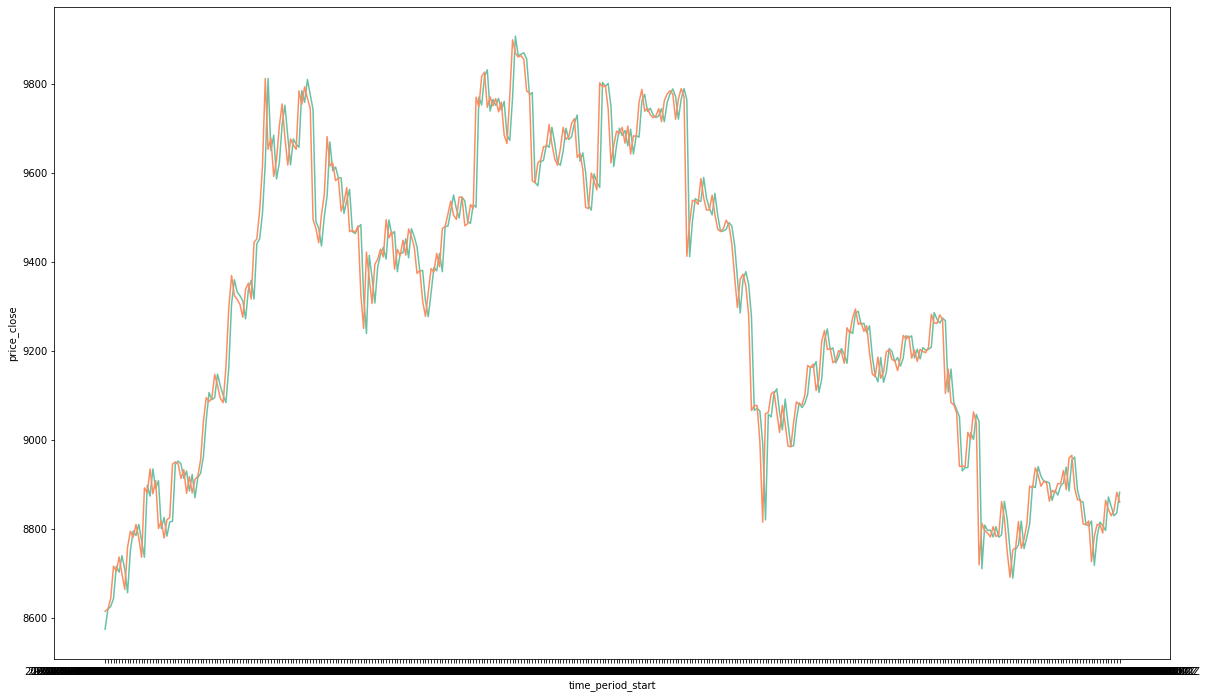

In [12]:
# Sample Visualization:
fig = plt.figure(figsize=(20, 12))

ax = sns.lineplot(data=df_trailing_two, x=df_trailing_two.time_period_start, 
                  y=df_trailing_two.price_open)
ax = sns.lineplot(data=df_trailing_two, x=df_trailing_two.time_period_start, 
                  y=df_trailing_two.price_close)
                  
plt.show();

In [13]:
from twitterscraper import query_tweets

INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}


In [14]:
# PoC/Test Query:
for tweet in query_tweets("BTC", 1000)[:1000]:
    print(tweet.user.encode('utf-8'))

INFO: queries: ['BTC since:2006-03-21 until:2006-12-05', 'BTC since:2006-12-05 until:2007-08-21', 'BTC since:2007-08-21 until:2008-05-06', 'BTC since:2008-05-06 until:2009-01-20', 'BTC since:2009-01-20 until:2009-10-06', 'BTC since:2009-10-06 until:2010-06-22', 'BTC since:2010-06-22 until:2011-03-08', 'BTC since:2011-03-08 until:2011-11-22', 'BTC since:2011-11-22 until:2012-08-07', 'BTC since:2012-08-07 until:2013-04-23', 'BTC since:2013-04-23 until:2014-01-07', 'BTC since:2014-01-07 until:2014-09-23', 'BTC since:2014-09-23 until:2015-06-09', 'BTC since:2015-06-09 until:2016-02-23', 'BTC since:2016-02-23 until:2016-11-08', 'BTC since:2016-11-08 until:2017-07-25', 'BTC since:2017-07-25 until:2018-04-10', 'BTC since:2018-04-10 until:2018-12-25', 'BTC since:2018-12-25 until:2019-09-10', 'BTC since:2019-09-10 until:2020-05-26']
INFO: Querying BTC since:2006-03-21 until:2006-12-05
INFO: Querying BTC since:2008-05-06 until:2009-01-20
INFO: Querying BTC since:2007-08-21 until:2008-05-06
INFO:

INFO: Using proxy 85.10.198.215:3838
INFO: Using proxy 85.10.198.215:3838
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-420342533932085248-420343993075892224&q=BTC%20since%3A2013-04-23%20until%3A2014-01-07&l=
INFO: Using proxy 85.10.198.215:3838
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-608058532672487424-608060581187358721&q=BTC%20since%3A2014-09-23%20until%3A2015-06-09&l=
INFO: Using proxy 85.10.198.215:3838
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-208666042-216514052&q=BTC%20since%3A2006-12-05%20until%3A2007-08-21&l=
INFO: Using proxy 85.10.198.21

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLetl8KJphsWgICo4cTRiaYbEjUAFQAlAFUAFQAA&q=BTC%20since%3A2017-07-25%20until%3A2018-04-10&l=
INFO: Using proxy 193.68.200.85:52825
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKu1v6LD8x0WhIC6_Y3Bw_MdEjUAFQAlAFUAFQAA&q=BTC%20since%3A2018-04-10%20until%3A2018-12-25&l=
INFO: Using proxy 193.68.200.85:52825
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 197.216.2.14:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=

INFO: Using proxy 187.177.139.8:8080
INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 167.114.112.84:80
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 157.245.63.182:8118
INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 79.137.254.51:33143
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006-03-21%20until%3A2006-12-05&l=
INFO: Using proxy 180.183.50.15:8213
INFO: Retrying... (Attempts left: 19)
INFO: Scraping tweets from https://twitter.com/search?f=tweets&vertical=default&q=BTC%20since%3A2006

AttributeError: 'Tweet' object has no attribute 'user'